In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("medical_examination.csv")

df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
df["cholesterol"].value_counts()

1    52385
2     9549
3     8066
Name: cholesterol, dtype: int64

In [5]:
df["cholesterol"].replace({1:0, 2:1, 3:1}, inplace=True)

In [6]:
df["gluc"].replace({1:0, 2:1, 3:1}, inplace=True)

In [7]:
df["overweight"] = df["weight"] / (df["height"]/100)**2

In [8]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177


1. buat catplot

In [9]:
# https://www.geeksforgeeks.org/how-to-replace-values-in-column-based-on-condition-in-pandas/

df.loc[df["overweight"] > 25, "overweight"] = 1

In [10]:
df.loc[df["overweight"] !=1, "overweight"] = 0

In [11]:
df["overweight"].astype(int)

0        0
1        1
2        0
3        1
4        0
        ..
69995    1
69996    1
69997    1
69998    1
69999    0
Name: overweight, Length: 70000, dtype: int32

In [12]:
df["overweight"].value_counts()

1.0    43546
0.0    26454
Name: overweight, dtype: int64

In [13]:
df_cat = df.copy(deep=True)

In [14]:
# df_cat

In [15]:
df_cat = pd.melt(df_cat, id_vars="cardio", value_vars=["active", "alco", "cholesterol", "gluc", "overweight", "smoke"])

df_cat

,cardio,variable,value
0,0,active,1.0
1,1,active,1.0
2,1,active,0.0
3,1,active,1.0
4,0,active,0.0
...,...,...,...
419995,0,smoke,1.0
419996,1,smoke,0.0
419997,1,smoke,0.0
419998,1,smoke,0.0


In [16]:
# https://stackoverflow.com/questions/19523277/renaming-column-names-in-pandas-groupby-function

df_cat = df_cat.groupby(["cardio", "variable", "value"]).agg(total = ("value", "count"))
df_cat = pd.DataFrame(df_cat)
df_cat

total
cardio variable    value       
0      active      0.0     6378
                   1.0    28643
       alco        0.0    33080
                   1.0     1941
       cholesterol 0.0    29330
                   1.0     5691
       gluc        0.0    30894
                   1.0     4127
       overweight  0.0    15915
                   1.0    19106
       smoke       0.0    31781
                   1.0     3240
1      active      0.0     7361
                   1.0    27618
       alco        0.0    33156
                   1.0     1823
       cholesterol 0.0    23055
                   1.0    11924
       gluc        0.0    28585
                   1.0     6394
       overweight  0.0    10539
                   1.0    24440
       smoke       0.0    32050
                   1.0     2929

In [17]:
df_cat.reset_index(inplace=True)

In [18]:
df_cat

,cardio,variable,value,total
0,0,active,0.0,6378
1,0,active,1.0,28643
2,0,alco,0.0,33080
3,0,alco,1.0,1941
4,0,cholesterol,0.0,29330
5,0,cholesterol,1.0,5691
6,0,gluc,0.0,30894
7,0,gluc,1.0,4127
8,0,overweight,0.0,15915
9,0,overweight,1.0,19106


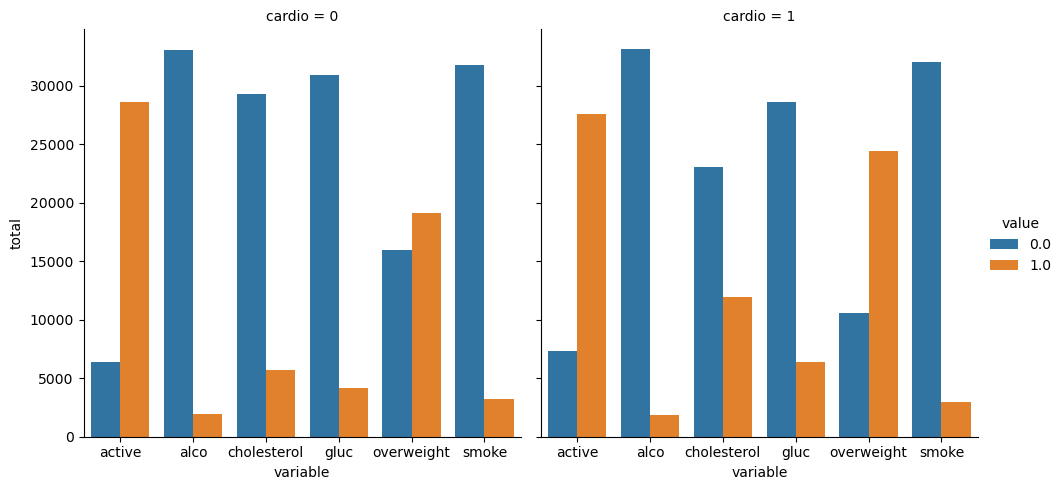

In [19]:
fig = sns.catplot(data = df_cat, 
            x ="variable", 
            y = "total", 
            hue = "value", 
            col = "cardio", 
            kind = "bar").fig


In [20]:
fig.savefig('catplot.png')

2. create heatmap

In [21]:
df_heat = df.copy(deep=True)

In [22]:
df_heat = df_heat[
                    (df_heat['ap_lo'] <= df_heat['ap_hi']) &
                    (df_heat['height'] >= df_heat['height'].quantile(0.025)) &
                    (df_heat['height'] <= df_heat['height'].quantile(0.975)) &
                    (df_heat['weight'] >= df_heat['weight'].quantile(0.025)) &
                    (df_heat['weight'] <= df_heat['weight'].quantile(0.975))
                 ]

In [23]:
# create correlation

corr = df_heat.corr(method="pearson")

In [24]:
# masking upper triangle heatmap
# https://stackoverflow.com/questions/57414771/how-to-plot-only-the-lower-triangle-of-a-seaborn-heatmap

masking = np.triu(corr)

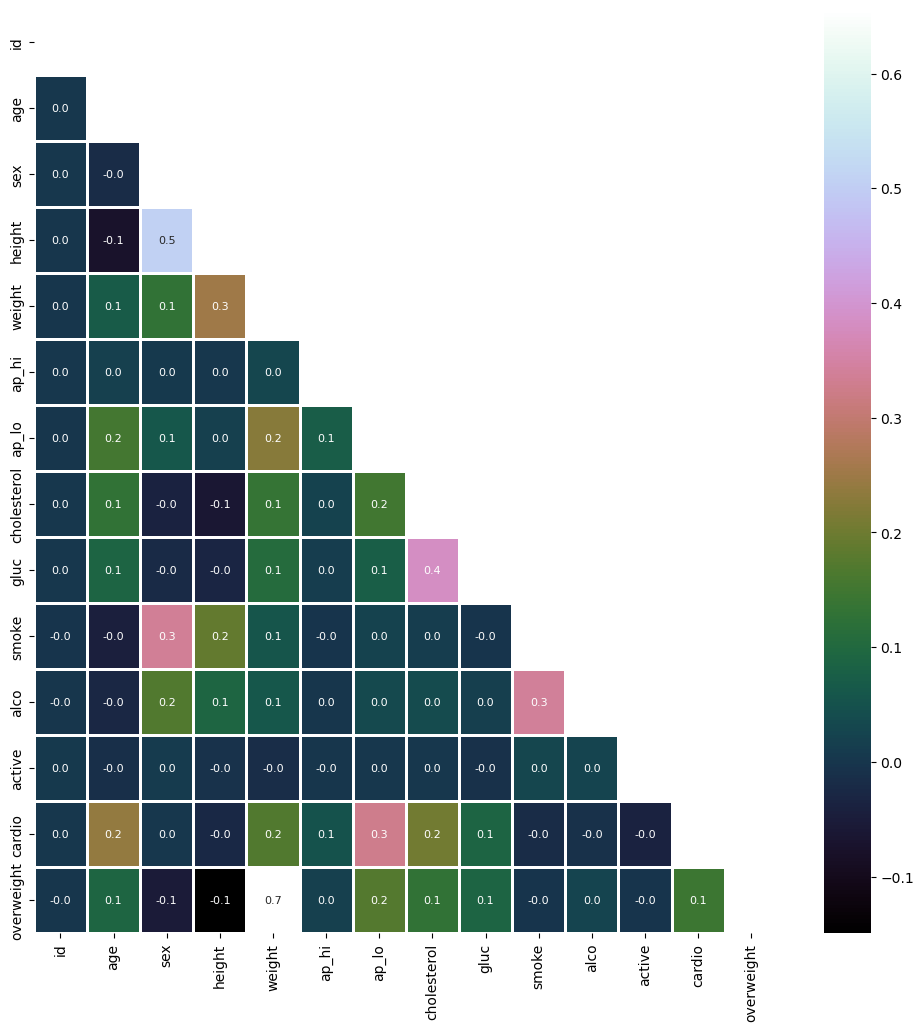

In [25]:
# create heatmap
# plt.figure(figsize=(12,6))

fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(data=corr, 
            mask=masking, 
            annot=True,
           cmap="cubehelix",
            fmt=".1f",
           annot_kws={"fontsize":8},
                linewidths=1)


In [26]:
fig.savefig('heatmap.png')